<a href="https://colab.research.google.com/github/peisuke/ml-works/blob/main/2/2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- 本コードは以下のサイトを参考にしました
- https://qiita.com/0NE_shoT_/items/08376b08783cd554b02e

In [1]:
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
boston = load_boston() # データセットの読み込み
boston_df = pd.DataFrame(boston.data, columns = boston.feature_names) # 説明変数(boston.data)をDataFrameに保存
boston_df['MEDV'] = boston.target # 目的変数(boston.target)もDataFrameに追加

In [3]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


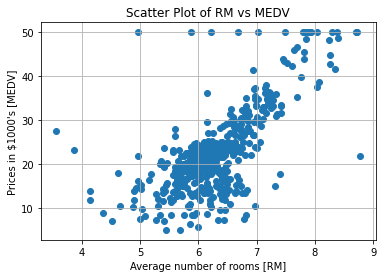

In [4]:
plt.scatter(boston_df['RM'], boston_df['MEDV']) # 平均部屋数と住宅価格の散布図をプロット

plt.title('Scatter Plot of RM vs MEDV')    # 図のタイトル
plt.xlabel('Average number of rooms [RM]') # x軸のラベル
plt.ylabel('Prices in $1000\'s [MEDV]')    # y軸のラベル
plt.grid()                                 # グリッド線を表示

plt.show()                                 # 図の表示

In [5]:
boston_df[['RM','MEDV']].corr()

,RM,MEDV
RM,1.00000,0.69536
MEDV,0.69536,1.00000


In [6]:
lr = LinearRegression()

X = boston_df[['RM']].values         # 説明変数（Numpyの配列）
Y = boston_df['MEDV'].values         # 目的変数（Numpyの配列）

lr.fit(X, Y)                         # 線形モデルの重みを学習


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
print('coefficient = ', lr.coef_[0]) # 説明変数の係数を出力
print('intercept = ', lr.intercept_) # 切片を出力

coefficient =  9.10210898118031
intercept =  -34.67062077643857


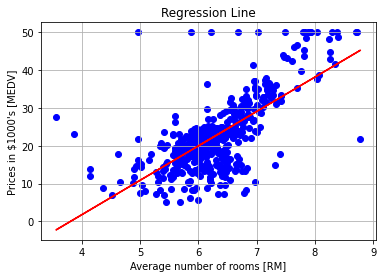

In [8]:
plt.scatter(X, Y, color = 'blue')         # 説明変数と目的変数のデータ点の散布図をプロット
plt.plot(X, lr.predict(X), color = 'red') # 回帰直線をプロット

plt.title('Regression Line')               # 図のタイトル
plt.xlabel('Average number of rooms [RM]') # x軸のラベル
plt.ylabel('Prices in $1000\'s [MEDV]')    # y軸のラベル
plt.grid()                                 # グリッド線を表示

plt.show()                                 # 図の表示